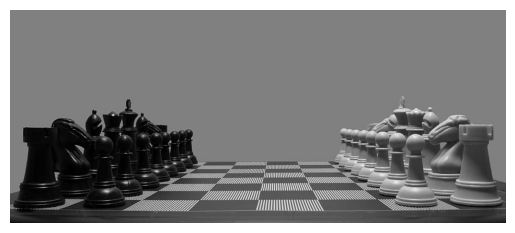

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
image = cv2.imread("chess 1.jpg") 
plt.imshow(image)
plt.axis('off')
plt.show()

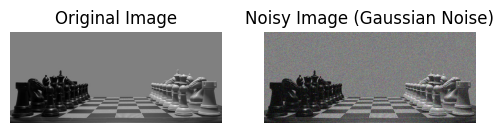

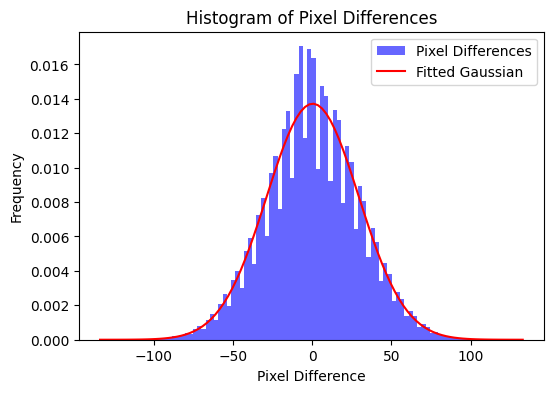

In [12]:
mean = 0  
std_dev = 30 
gaussian_noise = np.random.normal(mean, std_dev, image.shape)

noisy_image = image.astype(np.float32) + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  


plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Gaussian Noise)")
plt.axis("off")

plt.show()


diff = noisy_image.astype(np.float32) - image.astype(np.float32)
plt.figure(figsize=(6, 4))
plt.hist(diff.ravel(), bins=100, density=True, color='blue', alpha=0.6, label="Pixel Differences")


mean, std_dev = np.mean(diff), np.std(diff)
x = np.linspace(diff.min(), diff.max(), 100)
gaussian_curve = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

plt.plot(x, gaussian_curve, color='red', label="Fitted Gaussian")

plt.xlabel("Pixel Difference")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Pixel Differences")
plt.show()

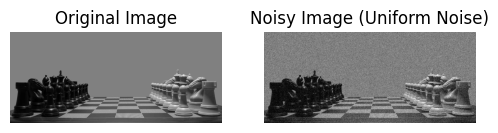

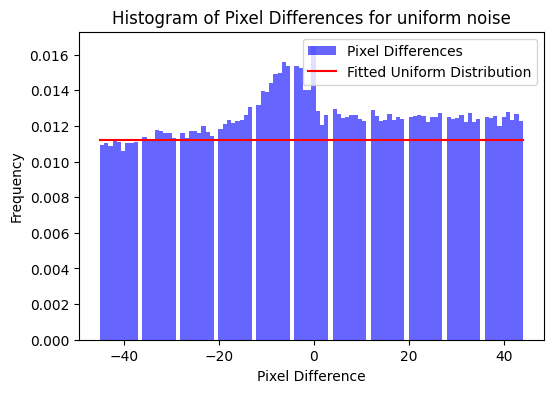

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("chess 1.jpg", cv2.IMREAD_GRAYSCALE)

low = -45  
high = 45  
uniform_noise = np.random.uniform(low, high, image.shape)


noisy_image = image.astype(np.float32) + uniform_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  


plt.figure(figsize=(6, 4))


plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Uniform Noise)")
plt.axis("off")

plt.show()


diff = noisy_image.astype(np.float32) - image.astype(np.float32)
plt.figure(figsize=(6, 4))
plt.hist(diff.ravel(), bins=100, density=True, color='blue', alpha=0.6, label="Pixel Differences")
min_diff, max_diff = diff.min(), diff.max()
x = np.linspace(min_diff, max_diff, 100)
uniform_curve = np.ones_like(x) / (max_diff - min_diff)  

plt.plot(x, uniform_curve, color='red', label="Fitted Uniform Distribution")

plt.xlabel("Pixel Difference")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Pixel Differences for uniform noise")
plt.show()


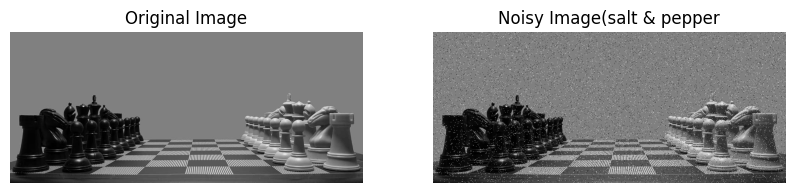

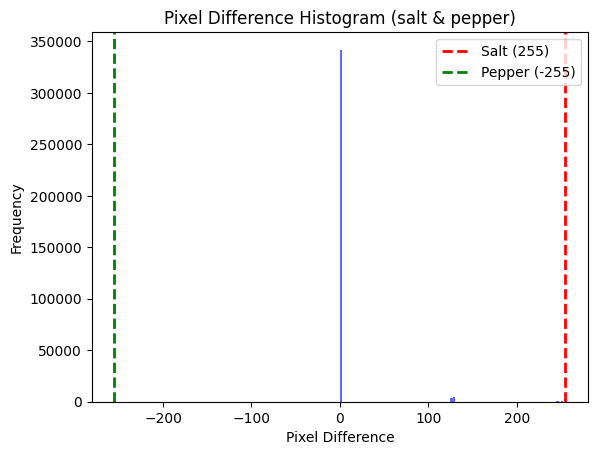

In [3]:

import numpy as np
import cv2
import matplotlib.pyplot as plt


image = cv2.imread("chess 1.jpg", cv2.IMREAD_GRAYSCALE)

salt_prob, pepper_prob = 0.02, 0.02

noisy_image = image.copy()
noisy_image[np.random.rand(*image.shape) < salt_prob] = 255 
noisy_image[np.random.rand(*image.shape) < pepper_prob] = 0 


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image(salt & pepper"), plt.axis("off")
plt.show()


diff = noisy_image - image
plt.hist(diff.ravel(), bins=100, color='blue', alpha=0.6)
plt.axvline(255, color='red', linestyle='dashed', linewidth=2, label='Salt (255)')
plt.axvline(-255, color='green', linestyle='dashed', linewidth=2, label='Pepper (-255)')
plt.legend()
plt.title("Pixel Difference Histogram (salt & pepper)")
plt.xlabel("Pixel Difference")
plt.ylabel("Frequency")
plt.show()


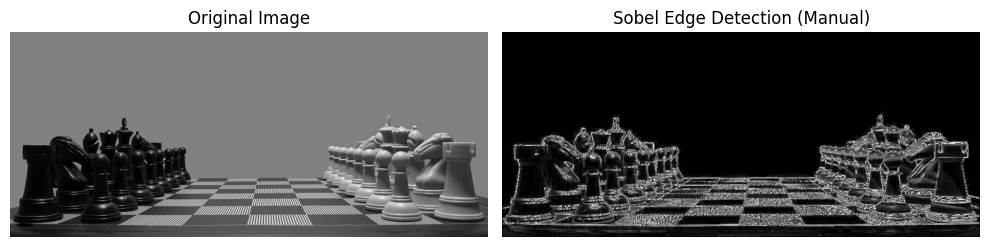

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("chess 1.jpg", cv2.IMREAD_GRAYSCALE)
height, width = image.shape

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

gradient_x = np.zeros_like(image, dtype=np.float32)
gradient_y = np.zeros_like(image, dtype=np.float32)


for i in range(1, height - 1):
    for j in range(1, width - 1):
    
        region = image[i - 1:i + 2, j - 1:j + 2]
        grad_x = np.sum(region * sobel_x)
        grad_y = np.sum(region * sobel_y)
        
  
        gradient_x[i, j] = grad_x
        gradient_y[i, j] = grad_y


gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_magnitude = np.uint8(np.absolute(gradient_magnitude))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Sobel Edge Detection (Manual)")
plt.axis('off')

plt.tight_layout()
plt.show()




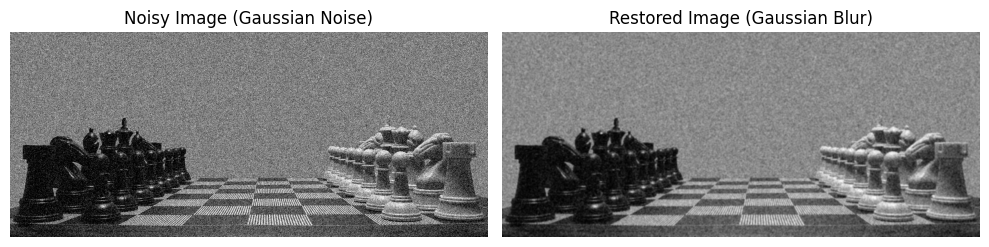

In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image = cv2.imread("chess 1.jpg", cv2.IMREAD_GRAYSCALE)
mean = 0  
std_dev = 30  #
gaussian_noise = np.random.normal(mean, std_dev, image.shape)

noisy_image = image.astype(np.float32) + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

restored_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Gaussian Noise)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title("Restored Image (Gaussian Blur)")
plt.axis("off")

plt.tight_layout()
plt.show()


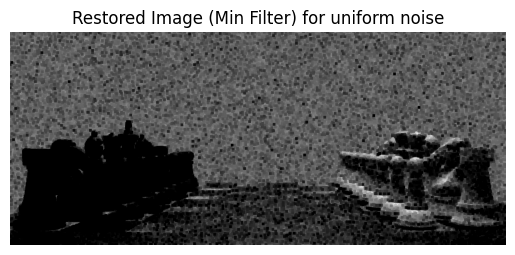

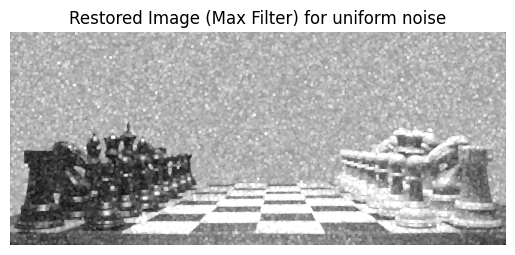

In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image = cv2.imread("Downloads/chess 1.jpg", cv2.IMREAD_GRAYSCALE)
kernel_size = 5   
min_filtered_image = cv2.erode(noisy_image, np.ones((kernel_size, 
kernel_size), np.uint8)) 
max_filtered_image = cv2.dilate(noisy_image, np.ones((kernel_size, 
kernel_size), np.uint8)) 

 
plt.imshow(min_filtered_image, cmap='gray') 
plt.title("Restored Image (Min Filter) for uniform noise") 
plt.axis("off") 
plt.show()
 
plt.imshow(max_filtered_image, cmap='gray') 
plt.title("Restored Image (Max Filter) for uniform noise") 
plt.axis("off")

plt.show()


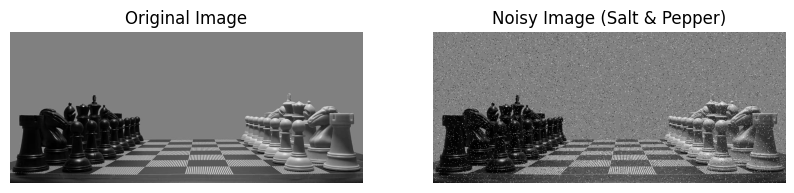

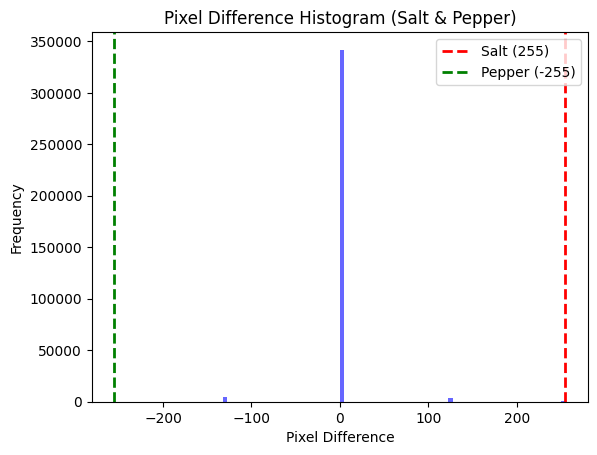

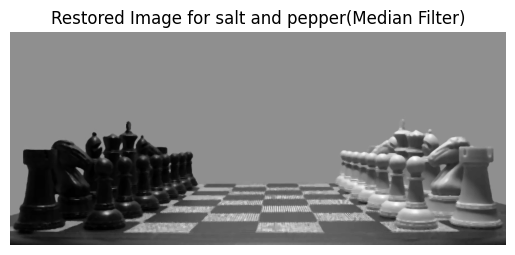

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread("chess 1.jpg", cv2.IMREAD_GRAYSCALE)

# Define probability of salt & pepper noise
salt_prob, pepper_prob = 0.02, 0.02  

# Create a copy to add noise
noisy_image = image.copy()

# Add Salt Noise (255)
salt_mask = np.random.rand(*image.shape) < salt_prob
noisy_image[salt_mask] = 255  

# Add Pepper Noise (0)
pepper_mask = np.random.rand(*image.shape) < pepper_prob
noisy_image[pepper_mask] = 0  

# Plot original and noisy images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Salt & Pepper)")
plt.axis("off")

plt.show()

# Histogram of pixel differences
diff = noisy_image.astype(np.float32) - image.astype(np.float32)
plt.hist(diff.ravel(), bins=100, color='blue', alpha=0.6)
plt.axvline(255, color='red', linestyle='dashed', linewidth=2, label='Salt (255)')
plt.axvline(-255, color='green', linestyle='dashed', linewidth=2, label='Pepper (-255)')
plt.legend()
plt.title("Pixel Difference Histogram (Salt & Pepper)")
plt.xlabel("Pixel Difference")
plt.ylabel("Frequency")
plt.show()

# Apply Median Filter for noise removal
restored_image = cv2.medianBlur(noisy_image, 5)  # Corrected

# Show restored image
plt.imshow(restored_image, cmap='gray')
plt.title("Restored Image for salt and pepper(Median Filter)")
plt.axis('off')

plt.show()
